# Concepts clés de l'interprétabilité : 

ce guide couvre de nombreuses méthodes d'interprétation de modèles : certaines produisent des métriques, d'autres des visuels et d'autres les deux ; certains décrivent votre modèle de manière générale et d'autres de manière granulaire. Dans ce chapitre, nous allons découvrir deux méthodes, l'importance des caractéristiques et les régions de décision, ainsi que les taxonomies utilisées pour décrire ces méthodes. 

Nous détaillerons également les éléments qui entravent l'interprétabilité de l'apprentissage automatique en guise d'introduction à ce qui nous attend. Voici les principaux sujets que nous allons couvrir dans ce chapitre : 

* En savoir plus sur les types et les champs d'application des méthodes d'interprétation 

* Apprécier ce qui entrave l'interprétabilité de l'apprentissage automatique

## La mission 

Imaginez que vous êtes analyste pour un ministère national de la Santé et qu'il y a une épidémie de maladies cardiovasculaires (MCV). Le ministre s'est fixé comme priorité d'inverser la croissance et de réduire le nombre de cas à son plus bas niveau en 20 ans. À cette fin, un groupe de travail a été créé pour trouver des indices dans les données afin de déterminer ce qui suit : 

* 1. Quels facteurs de risque peuvent être traités. 

* 2. Si les cas futurs peuvent être prédits, interprétez les prédictions au cas par cas. 


Vous faites partie de ce groupe de travail !

## Détails sur CVDB

Avant de nous plonger dans les données, nous devons rassembler quelques détails importants sur CVD afin de faire ce qui suit :

*  Comprendre le contexte et la pertinence du problème.
* Extraire des informations sur les connaissances du domaine qui peuvent éclairer notre analyse de données et notre interprétation du modèle.
* Relier un arrière-plan éclairé par des experts sur les caractéristiques d'un ensemble de données.

Les maladies cardiovasculaires sont un groupe de troubles, dont le plus courant est la maladie coronarienne (également connue sous le nom de maladie cardiaque ischémique). Selon l'Organisation mondiale de la santé, les MCV sont la principale cause de décès dans le monde, tuant près de 18 millions de personnes chaque année. Les maladies coronariennes et les accidents vasculaires cérébraux (qui sont, pour la plupart, un sous-produit des maladies cardiovasculaires) en sont les principaux contributeurs. On estime que 80 % des MCV sont constituées de facteurs de risque modiables. En d'autres termes, certains des facteurs évitables qui causent les MCV sont les suivants :


* Mauvaise alimentation
* Habitudes de consommation de tabac et d'alcool
* Obésité
* Manque d'activité physique
* Mauvais sommeil


De plus, bon nombre des facteurs de risque sont non modifiables et donc inévitables, notamment les suivants :

* Prédisposition génétique
* Vieillesse
* Homme (varie avec l'âge)


Nous n'entrerons pas dans les détails spécifiques à un domaine concernant les CVD car cela n'est pas nécessaire pour donner un sens à l'exemple. Cependant, on ne soulignera jamais assez à quel point la connaissance du domaine est centrale pour modéliser l'interprétation. Donc, si cet exemple était votre travail et que de nombreuses vies dépendaient de votre analyse, il serait conseillé de lire les dernières recherches scientifiques sur le sujet ou de consulter des experts du domaine pour éclairer vos interprétations.

## L'approche

La régression logistique est un moyen courant de classer les facteurs de risque dans les cas d'utilisation médicale. Contrairement à la régression linéaire, elle n'essaie pas de prédire une valeur continue pour chacune de vos observations, mais elle prédit un score de probabilité qu'une observation appartienne à une classe particulière. Dans ce cas, ce que nous essayons de prédire, c'est, étant donné les données x pour chaque patient, quelle est la probabilité y, de 0 à 1, qu'ils aient une maladie cardiovasculaire ?

In [ ]:
#!pip install --upgrade machine-learning-datasets

In [ ]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
cvd_df = mldatasets.load("cardiovascular-disease")

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to /content/data/cardio_train.csv
1 dataset files found in /content/data folder
parsing /content/data/cardio_train.csv


À partir de cela, vous devriez obtenir 70 000 enregistrements et 12 colonnes. Nous pouvons jeter un œil à ce qui a été chargé avec info()

In [ ]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


## Le dictionnaire de données
Pour comprendre ce qui a été chargé, voici le dictionnaire de données, tel que décrit dans la source :

* age : du patient en jours (fonction objectif)
* height : en centimètres (fonction objectif)
* weight : en kg (fonction objectif) )
* gender : un binaire où 1 : féminin, 2 : masculin (caractéristique objective)
* ap_hi : pression artérielle systolique, qui est la pression artérielle exercée lorsque le sang est éjecté pendant la contraction ventriculaire. Valeur normale : < 120 mmHg (fonction d'examen) 

* ap_lo : pression artérielle diastolique, qui est la pression artérielle entre les battements cardiaques. Valeur normale : < 80 mmHg (fonction d'examen)

* cholesterol : un ordinal où 1 : normal, 2 : au-dessus de la normale, 3 : bien au-dessus de la normale (fonction d'examen)
* gluc : un ordinal où 1 : normal, 2 : au-dessus de la normale, 3 : bien au-dessus de la normale (fonction d'examen)

* smoke : un binaire où 0 : non-fumeur, 1 : fumeur (fonction subjective)
* alco : un binaire où 0 : non-buveur, 1 : buveur (fonction subjective)
*  actif : A binaire où 0 : non actif, 1 : actif (fonction subjective)
* cardio : un binaire où 0 : pas de CVD, 1 : a CVD (fonction cible)



## Préparation des données 

Pour des raisons d'interprétabilité et de performance du modèle, il existe plusieurs tâches de préparation de données que nous pouvons prendre en charge, mais celle qui se démarque actuellement est l'âge. L'âge n'est pas quelque chose que nous mesurons habituellement en jours. En fait, pour les prédictions liées à la santé comme celle-ci, nous pourrions même vouloir les classer par tranches d'âge, car les gens ont tendance à vieillir différemment. Pour l'instant, nous allons convertir tous les âges en années :

In [ ]:
cvd_df['age'] =  cvd_df['age'] / 365.24

Le résultat est une colonne plus compréhensible car nous nous attendons à ce que les valeurs d'âge soient comprises entre 0 et 120. Nous avons pris les données existantes et les avons transformées. Il s'agit d'un exemple d'ingénierie de caractéristiques, c'est-à-dire lorsque vous utilisez la connaissance du domaine de vos données pour créer des caractéristiques qui représentent mieux votre problème, améliorant ainsi vos modèles. Nous en discuterons plus en détail au chapitre 10, Sélection de caractéristiques et ingénierie pour l'interprétabilité, et au chapitre 12, Contraintes monotones et ajustement du modèle pour l'interprétabilité. Il est utile d'effectuer une ingénierie de caractéristiques simplement pour rendre les résultats du modèle plus interprétables tant que cela ne nuit pas aux performances du modèle. Concernant la colonne âge, ça ne peut pas faire de mal car nous n'avons pas dégradé les données. 

C'est parce que vous avez toujours les points décimaux pour les années qui représentent les jours. Nous allons maintenant jeter un œil aux statistiques récapitulatives pour chacune de nos fonctionnalités à l'aide de la méthode describe() :

In [ ]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.304309,6.755152,29.564122,48.36272,53.945351,58.391742,64.924433
gender,70000.0,1.349571,0.476838,1.000000,1.00000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.00000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.00000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.00000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.00000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.00000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.00000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.00000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.00000,0.000000,0.000000,1.000000


montre les statistiques récapitulatives produites par le code précédent. l'âge semble bon car il se situe entre 29 et 65 ans, ce qui n'est pas inhabituel, mais il existe des valeurs aberrantes pour ap_hi et ap_lo. La pression artérielle ne peut pas être négative, et la plus élevée jamais enregistrée était de 370. Ces enregistrements devront être supprimés car ils pourraient conduire à de mauvaises performances et à une interprétation médiocre du modèle.


Pour faire bonne mesure, nous devons nous assurer que ap_hi est toujours supérieur à ap_lo, donc tout enregistrement avec cette différence doit également être supprimé

In [ ]:
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

Maintenant, afin d'adapter un modèle de régression logistique, nous devons regrouper toutes les caractéristiques objectives, d'examen et subjectives en tant que x et la caractéristique cible seule en tant que y . Après cela, vous divisez x et y en ensembles de données d'entraînement et de test, mais assurez-vous d'inclure random_state pour la reproductibilité :

In [ ]:
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

## En savoir plus sur les types et les champs d'application des méthodes d'interprétation 

Maintenant que nous avons préparé nos données et les avons divisées en ensembles de données d'entraînement/de test, nous pouvons adapter le modèle à l'aide des données d'entraînement et imprimer un résumé des résultats :

In [ ]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.190     
Dependent Variable: cardio           AIC:              65618.3485
Date:               2021-12-14 10:33 BIC:              65726.0502
No. Observations:   58404            Log-Likelihood:   -32797.   
Df Model:           11               LL-Null:          -40481.   
Df Residuals:       58392            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1730   0.2504 -44.6182 0.0000 -11.6638 -10.6822
age             0.0510   0.0015  34.7971 0.0000   0.0482   0.0539


Le résumé précédent nous aide à comprendre quelles caractéristiques de ont le plus contribué au diagnostic de CVD en utilisant les coefecients du modèle (étiquetés Coef. dans le tableau). Tout comme avec la régression linéaire, ils sont comme un poids appliqué à chaque prédicteur. Cependant, l'exposant de combinaison linéaire est une fonction logistique. Cela rend l'interprétation plus dificile. Nous expliquons cette fonction plus en détail au chapitre 3, Défis d'interprétation.


Vous ne pouvez dire qu'en le regardant que les caractéristiques avec les valeurs absolues les plus élevées sont le cholestérol et l'activité, mais ce n'est pas très intuitif en termes de ce que cela signifie. Une façon plus interprétable de regarder ces valeurs est révélée une fois que vous calculez l'exponentielle de ces coefecients

In [ ]:
np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.637374
ap_hi          1.057676
age            1.052357
weight         1.011129
ap_lo          1.010573
height         0.996389
gender         0.977519
gluc           0.890913
smoke          0.877576
alco           0.814627
active         0.806471
const          0.000014
dtype: float64

Pourquoi l'exponentiel ? Les coefficients sont les log odds, qui sont les logarithmes des cotes. De plus, les cotes sont la probabilité d'un cas positif sur la probabilité d'un cas négatif, où le cas positif est le phénomène que nous essayons de prédire. Cela n'indique pas nécessairement ce qui est favorisé par quiconque. Par exemple, si nous essayons de prédire les probabilités de pluie aujourd'hui, le cas positif serait qu'il ait plu, que vous ayez prévu ou non de la pluie. Les cotes sont souvent exprimées sous forme de rapport. Les nouvelles pourraient dire que la probabilité de pluie aujourd'hui est de 60% ou que les chances de pluie sont de 3:2 ou 3/2 = 1,5. Sous forme de cotes log, cela serait 0,176, qui est le logarithme de 1,5. Ils sont fondamentalement la même chose, mais exprimés différemment. Une fonction exponentielle est l'inverse d'un logarithme, elle peut donc prendre n'importe quelle cote de log et renvoyer la cote.


Revenons à notre cas CVD. Maintenant que nous avons les chances, nous pouvons interpréter ce que cela signifie. Par exemple, que signifient les probabilités dans le cas du cholestérol ? Cela signifie que les risques de MCV augmentent d'un facteur de 1,64 pour chaque unité supplémentaire de cholestérol, à condition que toutes les autres caractéristiques restent inchangées. Être capable d'expliquer l'impact d'une caractéristique sur le modèle en des termes aussi tangibles est l'un des avantages d'un modèle intrinsèquement interprétable tel que la régression logistique.

Bien que les cotes nous fournissent des informations utiles, elles ne nous disent pas ce qui compte le plus et, par conséquent, à elles seules, ne peuvent pas être utilisées pour mesurer l'importance d'une caractéristique. Mais comment cela pourrait-il être ? Si quelque chose a des chances plus élevées, alors cela doit avoir plus d'importance, n'est-ce pas ? Eh bien, pour commencer, ils ont tous des échelles différentes, ce qui fait une énorme différence. C'est parce que si vous voulez mesurer les chances d'augmentation de quelque chose, vous devez savoir de combien elle augmente généralement, car cela fournit un contexte. Par exemple, nous pourrions dire que les chances qu'une espèce spécifique de papillon vive un jour de plus sont de 0,66 après l'éclosion de ses premiers œufs. Cette déclaration n'a aucun sens pour vous à moins que vous ne connaissiez la durée de vie et le cycle de reproduction de cette espèce


Pour fournir un contexte à nos cotes, nous pouvons facilement calculer l'écart type de nos caractéristiques à l'aide de la fonction np.std :

In [ ]:
np.std(X_train, 0)

age             6.757537
gender          0.476697
height          8.186987
weight         14.335173
ap_hi          16.703572
ap_lo           9.547583
cholesterol     0.678878
gluc            0.571231
smoke           0.283629
alco            0.225483
active          0.397215
dtype: float64

Comme vous pouvez le constater par la sortie, les caractéristiques binaires et ordinales ne varient généralement que d'une unité au plus, mais les caractéristiques continues, telles que le poids ou ap_hi, peuvent varier de 10 à 20 fois plus, comme en témoigne l'écart type des caractéristiques.


Une autre raison pour laquelle les cotes ne peuvent pas être utilisées pour mesurer l'importance des caractéristiques est que, malgré des cotes favorables, les caractéristiques ne sont parfois pas statistiquement significatives. Ils sont entremêlés avec d'autres caractéristiques de telle manière qu'ils peuvent sembler importants, mais nous pouvons prouver qu'ils ne le sont pas. Cela peut être vu dans le tableau récapitulatif du modèle, sous le P>|z| colonne. Cette valeur est appelée la valeur p, et lorsqu'elle est inférieure à 0,05, les tests d'hypothèse déterminent qu'il existe des preuves solides qu'elle est signicative. Cependant, lorsqu'il est supérieur à ce nombre, en particulier par une large marge, il n'y a aucune preuve statistique que cela affecte le score prédit. C'est le cas du genre, du moins dans cet ensemble de données.


Si nous essayons d'obtenir les caractéristiques les plus importantes, une façon d'approcher cela est de multiplier les coefficients par les écarts types des caractéristiques. L'intégration des écarts types tient compte des différences de variance entre les caractéristiques. Par conséquent, il est préférable que nous éliminions également le genre pendant que nous y sommes :

In [ ]:
coefs = log_result.params.drop(labels=['const','gender'])
stdv = np.std(X_train, 0).drop(labels='gender')
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.936632
age            0.344855
cholesterol    0.334750
weight         0.158651
ap_lo          0.100419
active         0.085436
gluc           0.065982
alco           0.046230
smoke          0.037040
height         0.029620
dtype: float64

Le tableau précédent peut être interprété comme une approximation des facteurs de risque d'élevé à faible selon le modèle. Il s'agit également d'une méthode d'importance des caractéristiques spécifiques au modèle, en d'autres termes, une méthode d'interprétation (modulaire) d'un modèle global. Il y a beaucoup de nouveaux concepts à déballer ici, alors décomposons-les

## Types de méthodes d'interprétabilité de modèle

Il existe deux types de méthodes d'interprétabilité de modèle :

* Modèle-spécifique : lorsque la méthode ne peut être utilisée que pour une classe de modèle spécifique, elle est alors spécifique au modèle. La méthode détaillée dans l'exemple précédent ne peut fonctionner qu'avec la régression logistique car elle utilise ses coefficients. 

* Agnostique au modèle : ce sont des méthodes qui peuvent fonctionner avec n'importe quelle classe de modèle. Nous les couvrons au chapitre 4, Principes fondamentaux de l'importance et de l'impact des fonctionnalités

## Portées d'interprétabilité de modèle

il existe plusieurs portées d'interprétabilité de modèle : 

* Interprétation holistique globale : vous pouvez expliquer comment un modèle fait des prédictions simplement parce que vous pouvez comprendre l'intégralité du modèle à la fois avec une compréhension complète des données, et il s'agit d'un modèle entraîné. Par exemple, l'exemple de régression linéaire simple du chapitre 1, Interprétation, interprétabilité et explicabilité ; et Pourquoi tout est-il important ?, peuvent être visualisés dans un graphique en deux dimensions. Vous pouvez conceptualiser cela en mémoire, mais cela n'est possible que parce que la simplicité du modèle vous permet de le faire, et ce n'est pas très courant ni attendu.

* Interprétation modulaire globale : de la même manière que vous pouvez expliquer le rôle des parties de un moteur à combustion interne dans l'ensemble du processus de transformation du carburant en mouvement, vous pouvez également le faire avec un modèle. Par exemple, dans l'exemple du facteur de risque de MCV, notre méthode d'importance des caractéristiques nous indique que ap_hi (tension artérielle systolique), l'âge, le cholestérol et le poids sont les éléments qui ont le plus d'impact sur l'ensemble. L'importance des caractéristiques n'est qu'une des nombreuses méthodes d'interprétation modulaire globale, mais sans doute la plus importante. Le chapitre 4, Principes fondamentaux de l'importance et de l'impact des caractéristiques, donne plus de détails sur l'importance des caractéristiques.

* Interprétation locale d'une seule prédiction : vous pouvez expliquer pourquoi une seule prédiction a été effectuée. L'exemple suivant illustrera ce concept. 

* Interprétation de la prédiction de groupe locale : la même chose que la prédiction simple, sauf qu'elle s'applique aux groupes de prédictions.



Toutes nos félicitations! Vous avez déjà déterminé les facteurs de risque avec une méthode d'interprétation d'un modèle global, mais le ministre de la Santé souhaite également savoir si le modèle peut être utilisé pour interpréter des cas individuels. Alors, regardons ça

## Interprétation des prédictions individuelles avec la régression logistique

 Et si vous utilisiez le modèle pour prédire les MCV pour l'ensemble des données de test ? Vous pourriez le faire comme ceci :

In [ ]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
print(y_pred)

[0.40629892 0.17003609 0.13405939 ... 0.95575283 0.94095239 0.91455717]


Prenons un des cas positifs ; cas de test #2872

In [ ]:
print(y_pred[2872])

0.5746680418975686


Nous savons qu'il prédit positif pour les MCV car le score dépasse 0,5 :

Et voici les détails du cas de test n° 2872 :

In [ ]:
print(X_test.iloc[2872])

age             60.521849
gender           1.000000
height         158.000000
weight          62.000000
ap_hi          130.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 46965, dtype: float64


Ainsi, par les regards de la série précédente, nous savons que ce qui suit s'applique à cet individu : 

* Un ap_hi élevé limite (pression artérielle systolique).
* Ap_lo normal (pression artérielle diastolique). Avoir une pression artérielle systolique élevée et une pression artérielle diastolique normale est ce qu'on appelle une hypertension systolique isolée. Cela pourrait être à l'origine d'une prédiction positive, mais ap_hi est limite (130 mmHg étant la limite), donc l'état d'hypertension systolique isolée est limite.

* age n'est pas trop vieux, mais parmi les plus âgés de l'ensemble de données. 
* le cholesterol est normal.
* weight semble également être dans la fourchette saine.


Il n'y a pas non plus d'autres facteurs de risque : le glucose est normale, pas de tabac, pas d'alcool et pas de sédentarité, car l'individu est actif. On ne sait pas exactement pourquoi c'est positif. L'âge et la limite de l'hypertension systolique isolée suffisent-ils à faire pencher la balance ? Il est difficile de comprendre les raisons de la prédiction sans mettre toutes les prédictions en contexte, alors essayons de le faire !


Mais comment remettre tout en contexte en même temps ? Nous ne pouvons pas visualiser comment une prédiction se compare aux dix mille autres pour chaque caractéristique et leur diagnostic de MCV prévu respectif. Malheureusement, les humains ne peuvent pas traiter ce niveau de dimensionnalité, même s'il était possible de visualiser un hyperplan à dix dimensions !

Cependant, nous pouvons le faire pour deux caractéristiques à la fois, ce qui donne un graphique qui indique où se situe la limite de décision du modèle pour ces caractéristiques. En plus de cela, nous pouvons superposer les prédictions pour l'ensemble de données de test en fonction de toutes les fonctionnalités. Il s'agit de visualiser l'écart entre l'effeet de deux caractéristiques et les onze caractéristiques.

Cette méthode d'interprétation graphique est ce qu'on appelle une frontière de décision. Il trace des limites pour les classes, laissant des zones qui appartiennent à une classe ou à une autre. Ces zones sont appelées régions de décision. Dans ce cas, nous avons deux classes, nous verrons donc un graphique avec une seule frontière entre cardio=0 et cardio=1, concernant uniquement les deux caractéristiques que nous comparons.


Nous avons réussi à visualiser les deux caractéristiques basées sur la décision à la fois, avec une grande hypothèse selon laquelle si toutes les autres caractéristiques sont maintenues constantes, nous ne pouvons en observer que deux de manière isolée. Ceci est également connu sous le nom d'hypothèse ceteris paribus et est essentiel dans une enquête scientifique, nous permettant de contrôler certaines variables afin d'en observer d'autres. Une façon de le faire est de les remplir avec une valeur qui n'affectera pas le résultat. En utilisant le tableau des cotes que nous avons produit, nous pouvons dire si une caractéristique augmente car elle augmentera les chances de CVD. Ainsi, dans l'ensemble, une valeur inférieure est moins risquée pour les MCV

Par exemple, age=30 est la valeur la moins risquée de celles présentes dans l'ensemble de données pour age. Cela peut aussi aller dans la direction opposée, donc active=1 est connu pour être moins risqué que active=0. Nous pouvons trouver des valeurs optimales pour le reste des caractéristiques :

*  heigth=165.
* weight=57 (optimal pour cette taille).
* ap_hi=110.
* ap_lo=70.
* smoke=0.
* cholesterol=1 ( cela signifie normal).
* gendre peut être codé pour un homme ou une femme, ce qui n'a pas d'importance car les cotes pour le sexe (0,977519) sont si proches de 1


Le dictionnaire filler_feature_values ​​suivant illustre ce qu'il faut faire avec les caractéristiques correspondant à leur index à leurs valeurs les moins risquées

In [ ]:
filler_feature_values = {0: 1, 1: 30, 2: 1, 3: 165, 4: 57, 5: 110, 
                       6: 70, 7: 1, 8: 1, 9: 0, 10:0, 11:1
                    }

Dans le dictionnaire, les caractéristiques sont numérotées et non nommées car la fonction que nous utiliserons pour tracer les régions de décision ne prend que les tableaux NumPy. De plus, puisque, dans statsmodels, vous devez définir explicitement la constante (également connue sous le nom d'interception), le modèle logistique a une caractéristique 0 supplémentaire, qui est toujours égale à 1


Nous avons également l'intention de tracer les prédictions réelles pour l'ensemble de données de test. Pour ce faire, nous devons définir un autre dictionnaire comme filler_feature_values, mais avec une plage telle que, par exemple, la filler_feature_value pour la hauteur soit 165. Nous pouvons alors faire cette plage 120, elle inclut donc tous les cas avec des hauteurs 165 ± 110 , cela signifie donc une plage de [55 - 275] , qui contient toutes les hauteurs possibles dans l'ensemble de données de test :

In [ ]:
filler_feature_ranges = {0: 1, 1: 35, 2: 2, 3: 110, 4: 150, 5: 140, 
                       6: 70, 7: 3, 8: 3, 9: 2, 10:2, 11:2
                      }

La prochaine chose à faire est de créer un tableau NumPy en forme (1,12) avec le cas de test # 2872 afin que la fonction de traçage puisse le mettre en évidence. À cette fin, nous le convertissons d'abord en NumPy, puis préfixons la constante de 1, qui doit être la première caractéristique, puis le remodelons pour qu'il respecte les dimensions (1,12) :

In [ ]:
X_highlight = np.reshape(np.concatenate(([1], X_test.iloc[2872].to_numpy())), (1, 12))
print(X_highlight)

[[  1.          60.52184865   1.         158.          62.
  130.          80.           1.           1.           0.
    0.           1.        ]]


Nous sommes prêts à partir maintenant ! Visualisons quelques tracés de régions de décision ! Nous comparerons la caractéristique considérée comme le facteur de risque le plus élevé, ap_hi, avec les quatre facteurs de risque les plus importants suivants : age, cholesterol, weight et ap_lo.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


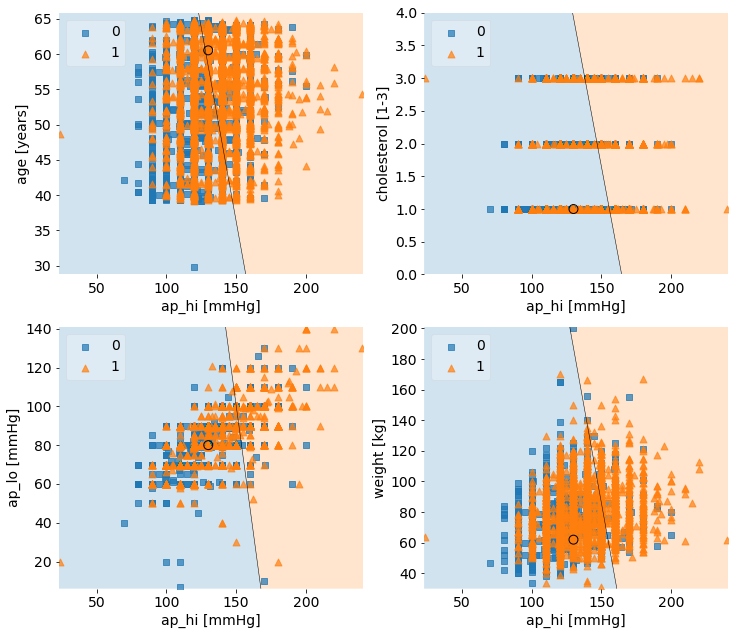

In [ ]:
plt.rcParams.update({'font.size': 14})

fig, axarr = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=False)

mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 1], ['ap_hi [mmHg]', 'age [years]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[0])

mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 7], ['ap_hi [mmHg]', 'cholesterol [1-3]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[1])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 6], ['ap_hi [mmHg]', 'ap_lo [mmHg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[2])
mldatasets.create_decision_plot(X_test, y_test, log_result, [5, 4], ['ap_hi [mmHg]', 'weight [kg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=axarr.flat[3])
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

Dans le graphique, le cercle représente le cas de test #2872. Dans tous les tracés à l'exception d'un, ce cas de test est sur la région de décision négative (côté gauche), représentant la classification cardio=0. L'ap_hi (tension artérielle systolique) limite élevé et l'âge relativement élevé suffisent à peine pour une prédiction positive dans le graphique en haut à gauche. Néanmoins, dans tous les cas, pour le cas de test n° 2872, nous avons prédit un score de 57 % pour les MCV, ce qui pourrait très bien expliquer la majeure partie de cela.

Sans surprise, à eux seuls, ap_hi et un taux de cholesterol sain ne suffisent pas à faire pencher la balance en faveur d'un diagnostic de MCV dénitive selon le modèle car il se situe décidément dans la région de décision négative, et un ap_lo normal (pression artérielle diastolique non plus) ). Vous pouvez voir à partir de ces trois graphiques que bien qu'il y ait un certain chevauchement dans la distribution des carrés et des triangles, il y a une tendance à ce que plus de triangles gravitent vers le côté positif à mesure que l'axe des y augmente, tandis que moins de carrés peuplent cette région.

Le chevauchement à travers la limite de décision est attendu car, après tout, ces carrés et triangles sont basés sur les effets de toutes les caractéristiques. Pourtant, vous vous attendez à trouver un modèle quelque peu cohérent. Le graphique avec ap_hi par rapport au poids n'a pas cette tendance verticalement à mesure que le poids augmente, ce qui suggère qu'il manque quelque chose dans cette histoire… Gardez cette pensée car nous allons étudier cela dans la section suivante !


Toutes nos félicitations! Vous avez terminé la deuxième partie de la demande du ministre. Le tracé de la région de décision, une méthode d'interprétation des modèles locaux, a fourni au ministère de la Santé un outil pour interpréter les prédictions de cas individuels. Vous pouvez maintenant étendre cela pour expliquer plusieurs cas à la fois, ou tracer des combinaisons de caractéristiques très importantes pour trouver celles où le cercle est décidément dans la région de décision positive. Vous pouvez également modifier certaines des variables de remplissage une par une pour voir comment elles font une différence. Par exemple, que se passe-t-il si vous augmentez l'âge des enfants jusqu'à l'âge médian de 54 ans ou même jusqu'à l'âge du cas de test #2872. Un ap_hi limite élevé et un taux de cholestérol sain suffiraient-ils désormais à faire pencher la balance ? Nous répondrons à cette question plus tard, mais commençons par comprendre ce qui peut rendre l'interprétation de l'apprentissage automatique si dicile

## Apprécier ce qui entrave l'interprétabilité de l'apprentissage automatique

 Dans la dernière section, nous nous demandions pourquoi le graphique avec ap_hi par rapport au poids n'avait pas de modèle concluant. Il se pourrait très bien que bien que le poids soit un facteur de risque, il existe d'autres variables médiatrices critiques qui pourraient expliquer le risque accru de MCV. Une variable médiatrice est une variable qui influence la force entre la variable indépendante et la variable cible (dépendante). Nous n'avons probablement pas besoin de trop réfléchir pour trouver ce qui manque. Au chapitre 1, Interprétation, interprétabilité et explicabilité ; et Pourquoi tout est-il important ?, nous avons effectué une régression linéaire sur le poids et la taille car il existe une relation linéaire entre ces variables. Dans le contexte de la santé humaine, le poids n'est pas aussi significatif sans la taille, vous devez donc considérer les deux

 Peut-être que si nous traçons les régions de décision pour ces deux variables, nous obtiendrons quelques indices. On peut les tracer avec le code suivant :

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


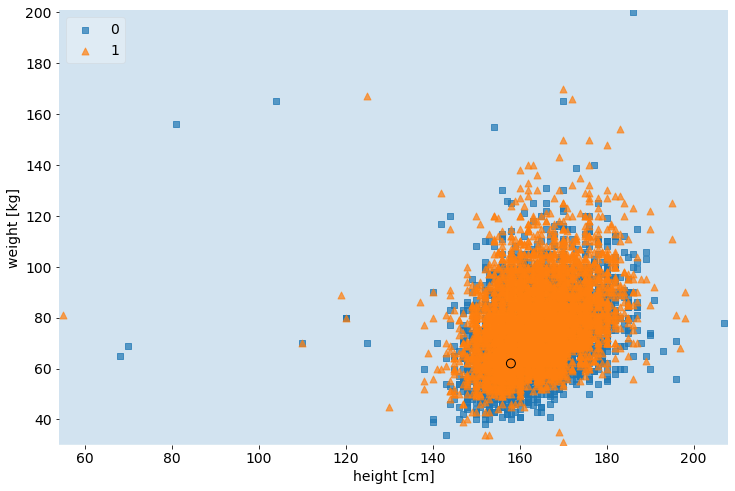

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X_test, y_test, log_result, [3, 4], ['height [cm]', 'weight [kg]'], 
                     X_highlight, filler_feature_values, filler_feature_ranges, ax=ax)
plt.show()

Aucune limite de décision n'a été établie dans la figure car si toutes les autres variables sont maintenues constantes (à une valeur moins risquée), aucune combinaison taille/poids n'est suffisante pour prédire les MCV. Cependant, nous pouvons dire qu'il existe un motif pour les triangles oranges, principalement situés dans une zone ovulaire. Cela donne un aperçu passionnant que même si nous nous attendons à ce que le poids augmente lorsque la taille augmente, le concept d'un poids intrinsèquement malsain n'est pas celui qui augmente linéairement avec la taille


En fait, pendant près de deux siècles, cette relation a été mathématiquement comprise sous le nom d'indice de masse corporelle (IMC) :


$$BMI = \frac{Weight_{kg}}{height_{m}^2}$$


Avant de discuter davantage de l'IMC, vous devez tenir compte de la complexité. Mis à part la dimensionnalité, il y a principalement trois choses qui introduisent une complexité qui rend l'interprétation dicile:
* 1. Non-linéarité
* 2. Interactivité
* 3. Non-monotonie

## Non-linéarité

Les équations linéaires telles que y = a + bx sont faciles à comprendre. Ils sont additifs, il est donc facile de séparer et de quantifier les effets de chacun de ses termes (a et bx) à partir du résultat du modèle (y). De nombreuses classes de modèles ont des équations linéaires incorporées dans les mathématiques. Ces équations peuvent à la fois être utilisées pour adapter les données au modèle et décrire le modèle. 

Cependant, il existe des classes modèles qui sont intrinsèquement non linéaires car elles introduisent la non-linéarité dans leur apprentissage. C'est le cas des modèles d'apprentissage profond car ils ont des fonctions d'activation non linéaires telles que le sigmoïde. Cependant, la régression logistique est considérée comme un modèle linéaire généralisé (GLM) car elle est additive. En d'autres termes, le résultat est une somme d'entrées et de paramètres pondérés. Nous discuterons plus en détail des GLM au chapitre 3, Les défis de l'interprétabilité. 


Cependant, même si votre modèle est linéaire, les relations entre les variables peuvent ne pas être linéaires, ce qui peut entraîner des performances et une interprétabilité médiocres. Ce que vous pouvez faire dans ces cas est d'adopter l'une des approches suivantes : 

* Utilisez une classe de modèle non linéaire, qui adaptera beaucoup mieux ces relations d'entités non linéaires, améliorant éventuellement les performances du modèle. Néanmoins, comme nous l'explorerons plus en détail dans le prochain chapitre, cela peut le rendre moins interprétable.

* Utilisez la connaissance du domaine pour concevoir une fonctionnalité qui peut aider à la « linéariser ». Par exemple, si une caractéristique a augmenté de façon exponentielle par rapport à une autre, vous pouvez concevoir une nouvelle variable avec le logarithme de cette caractéristique. Dans le cas de notre prédiction CVD, nous savons que l'IMC est un meilleur moyen de comprendre le poids en compagnie de la taille. Mieux encore, ce n'est pas une fonctionnalité arbitraire, elle est donc plus facile à interpréter. Nous pouvons prouver ce point en faisant une copie de l'ensemble de données, en y intégrant la fonction BMI, en entraînant le modèle avec cette fonction supplémentaire et en effectuant une interprétation locale du modèle. C'est exactement ce que fait l'extrait de code suivant :

In [ ]:
X2 = cvd_df.drop(['cardio'], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"]/100)**2

Pour illustrer cette nouvelle fonctionnalité, traçons l'IMC en fonction du poids et de la taille à l'aide du code suivant :

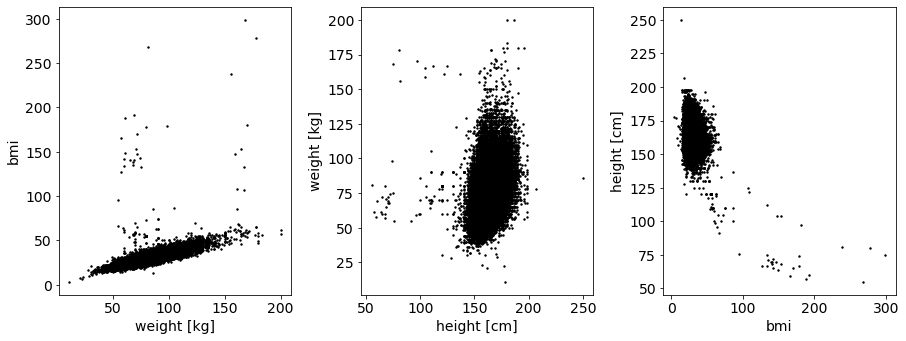

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
plt.rcParams.update({'font.size': 14})
axs[0].scatter(X2["weight"], X2["bmi"], color='black', s=2)
axs[0].set_xlabel('weight [kg]')
axs[0].set_ylabel('bmi')
axs[1].scatter(X2["height"], X2["weight"], color='black', s=2)
axs[1].set_xlabel('height [cm]')
axs[1].set_ylabel('weight [kg]')
axs[2].scatter(X2["bmi"], X2["height"], color='black', s=2)
axs[2].set_xlabel('bmi')
axs[2].set_ylabel('height [cm]')
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.3)
plt.show()

Comme vous pouvez le constater grâce aux graphiques de la figure il existe une relation linéaire plus définie entre l'imc et le poids qu'entre la taille et le poids et, même, entre l'imc et la taille. Adaptons le nouveau modèle avec la fonctionnalité supplémentaire à l'aide de l'extrait de code suivant

In [ ]:
X2 = X2.drop(['weight','height'], axis=1)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.15, random_state=9)

In [ ]:
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.562104
         Iterations 6


Voyons maintenant si le cas de test n° 2872 se trouve dans la région de décision positive lorsque l'on compare ap_hi à bmi :

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


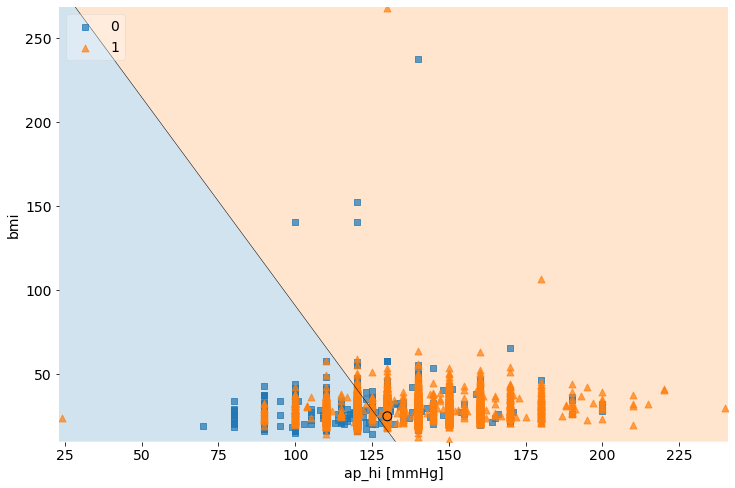

In [ ]:
filler_feature_values2 = {0: 1, 1: 60, 2: 1, 3: 110, 
                       4: 70, 5: 1, 6: 1, 7: 0, 8:0, 9:1, 10:20
                    }
filler_feature_ranges2 = {0: 1, 1: 35, 2: 2, 3: 140, 
                       4: 70, 5: 3, 6: 3, 7: 2, 8:2, 9:2, 10:250
                      }
X2_highlight = np.reshape(np.concatenate(([1],X2_test.iloc[2872].to_numpy())), (1, 11))
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X2_test, y_test, log_result2, [3, 10], ['ap_hi [mmHg]', 'bmi'], 
                     X2_highlight, filler_feature_values2, filler_feature_ranges2, ax=ax)
plt.show()

La figure montre que ap_hi et bmi peuvent aider à expliquer la prédiction positive pour les MCV car le cercle se trouve dans la région de décision positive. Veuillez noter qu'il existe probablement des valeurs aberrantes d'IMC anormal (l'IMC le plus élevé jamais enregistré était de 204), il y a donc probablement des poids ou des hauteurs incorrects dans l'ensemble de données.

## Quel est le problème avec les valeurs aberrantes ? 

Les valeurs aberrantes peuvent avoir une influence ou un effet de levier élevé et donc affecter le modèle lorsqu'elles sont entraînées avec celles-ci. Même s'ils ne le font pas, ils peuvent rendre l'interprétation plus dificile. S'ils sont anormaux, vous devez les supprimer, comme nous l'avons fait pour la tension artérielle au début de ce chapitre. Et parfois, ils peuvent se cacher à la vue de tous car ils ne sont perçus comme anormaux que dans le contexte d'autres caractéristiques. Dans tous les cas, il existe des raisons pratiques pour lesquelles les valeurs aberrantes sont problématiques, telles que la création de graphiques comme le précédent pour pouvoir les ajuster sans vous permettre d'apprécier la limite de décision là où cela compte. Et il y a aussi des raisons plus profondes, telles que la perte de confiance dans les données, entachant ainsi la confiance dans les modèles qui ont été formés sur ces données. Ce genre de problème est à prévoir avec des données du monde réel. Même si nous ne l'avons pas fait dans ce chapitre par souci d'opportunité, il est essentiel de commencer chaque projet en explorant en profondeur les données, en traitant les valeurs manquantes et les valeurs aberrantes, et d'autres tâches de gestion des données.

## Interactivité

Lorsque nous avons créé bmi, nous n'avons pas seulement linéarisé une relation non linéaire, mais nous avons également créé des interactions entre deux entités. bmi est donc une fonction d'interaction, mais cela a été informé par la connaissance du domaine. Cependant, de nombreuses classes de modèles le font automatiquement en permutant toutes sortes d'opérations entre les fonctionnalités. Après tout, les entités ont des relations latentes entre elles, comme la hauteur et la largeur, et ap_hi et ap_lo. Par conséquent, automatiser le processus de recherche n'est pas toujours une mauvaise chose. En fait, cela peut même être absolument nécessaire. C'est le cas pour de nombreux problèmes d'apprentissage en profondeur où les données ne sont pas structurées et, par conséquent, une partie de la tâche de formation du modèle consiste à rechercher les relations latentes pour lui donner un sens. Cependant, pour les données structurées, même si les interactions peuvent être importantes pour les performances du modèle, elles peuvent nuire à l'interprétabilité en ajoutant une complexité potentiellement inutile au modèle et en trouvant également des relations latentes qui ne veulent rien dire (ce qu'on appelle une fausse relation ou corrélation)

## Non-monotonie 

Souvent, une variable a une relation significative et cohérente entre une caractéristique et la variable cible. Ainsi, nous savons qu'à mesure que l'âge augmente, le risque de maladie cardiovasculaire (cardio) doit augmenter. Il n'y a aucun moment où vous atteignez un certain âge et ce risque diminue. Peut-être que le risque ralentit, mais il ne diminue pas. Nous appelons cela la monotonie, et les fonctions qui sont monotones sont soit toujours croissantes soit décroissantes dans tout leur domaine.


Veuillez noter que toutes les relations linéaires sont monotones, mais que toutes les relations monotones ne sont pas nécessairement linéaires. C'est parce qu'ils n'ont pas besoin d'être une ligne droite. Un problème courant dans l'apprentissage automatique est qu'un modèle ne connaît pas une relation monotone à laquelle nous nous attendons en raison de notre expertise dans le domaine. à cause du bruit et des omissions dans les données, le modèle est formé de telle manière qu'il y ait des hauts et des bas là où vous ne les attendez pas.


Proposons un exemple hypothétique. Imaginons qu'en raison d'un manque de disponibilité des données pour les 57-60 ans, et parce que les quelques cas que nous avons eu pour cette plage étaient négatifs pour les MCV, le modèle pourrait apprendre que c'est là que vous vous attendriez à une baisse de Risque de MCV. Certaines classes de modèles sont intrinsèquement monotones, comme la régression logistique, elles ne peuvent donc pas avoir ce problème, mais beaucoup d'autres le font. Nous examinerons cela plus en détail au chapitre 12, Contraintes monotones et ajustement du modèle pour l'interprétabilité

## Mission accomplie

La première partie de la mission consistait à comprendre les facteurs de risque des maladies cardiovasculaires, et vous avez déterminé que les quatre principaux facteurs de risque sont la pression artérielle systolique (ap_hi), l'âge, le cholestérol et le poids selon le modèle de régression logistique. , dont seul l'âge est non modifiable. Cependant, vous avez également réalisé que la pression artérielle systolique (ap_hi) n'est pas aussi significative en soi, car elle repose sur la pression artérielle diastolique (ap_lo) pour l'interprétation. Il en va de même pour le poids et la taille. Nous avons appris que l'interaction des caractéristiques joue un rôle crucial dans l'interprétation, de même que leur relation entre elles et avec la variable cible, qu'elle soit linéaire ou monotone. De plus, les données ne sont qu'une représentation de la vérité, ce qui peut être faux. Après tout, nous avons trouvé des anomalies qui, si elles ne sont pas vérifiées, peuvent biaiser notre modèle.


Une autre source de biais est la manière dont les données ont été collectées. Après tout, vous pouvez vous demander pourquoi les principales caractéristiques du modèle étaient toutes des caractéristiques objectives et d'examen. Pourquoi ne pas fumer ni boire n'est-il pas un facteur plus important ? Pour vérifier s'il y avait un biais d'échantillon impliqué, vous devrez comparer avec d'autres ensembles de données plus fiables pour vérifier si votre ensemble de données sous-représente les buveurs et les fumeurs. Ou peut-être que le biais a été introduit par la question qui demandait s'ils fumaient maintenant, et non s'ils avaient déjà fumé pendant une période prolongée. Un autre type de biais auquel nous pourrions remédier est le biais d'exclusion : nos données peuvent manquer d'informations expliquant la vérité que le modèle essaie de décrire. Par exemple, grâce à la recherche médicale, nous savons que les problèmes de tension artérielle tels que l'hypertension systolique isolée, qui augmente le risque de MCV, sont causés par des affections sous-jacentes telles que le diabète, l'hyperthyroïdie, la raideur artérielle et l'obésité, pour n'en nommer que quelques-unes. 


La seule de ces conditions que nous pouvons déduire des données est l'obésité, et pas les autres. Si nous voulons pouvoir interpréter correctement les prédictions d'un modèle, nous devons disposer de toutes les caractéristiques pertinentes. Sinon, il y aura des lacunes que nous ne pourrons pas expliquer. Peut-être qu'une fois que nous les ajouterons, ils ne feront pas beaucoup de différence, mais c'est à cela que servent les méthodes que nous apprendrons au chapitre 10, Sélection de fonctionnalités et ingénierie pour l'interprétabilité. La deuxième partie de la mission devait être capable d'interpréter les prédictions de modèles individuels. Nous pouvons le faire assez bien en traçant des régions de décision. C'est une méthode simple, mais elle a de nombreuses limitations, en particulier dans les situations où il y a plus d'une poignée de fonctionnalités, et elles ont tendance à interagir beaucoup les unes avec les autres. 

Le chapitre 6, Méthodes d'interprétation locales indépendantes du modèle, et le chapitre 7, Explications ancrées et contrefactuelles, couvriront de meilleures méthodes d'interprétation locale. Cependant, la méthode du tracé de la région de décision permet d'illustrer de nombreux concepts entourant les limites de décision que nous aborderons dans ces chapitres.